# Hints and tips for more efficient Jupyter Lab / Jupyter Notebook use

- `Ctrl/Cmd+Shift+C` (jupyter lab) or `Ctrl/Cmd+Shift+P` (jupyter notebook) opens the command-palette, where you can quickly search for and invoke functions.
- Keep most of your code in separate Python modules to enjoy the full IDE experience. To make this as smooth as possible, configure auto-reloading:

In [1]:
# pick up runtime changes to local modules that we specify as requiring auto-reloading
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 1

In [2]:
# to get interactive plots to work in jupyter lab, you need to
# - conda install ipympl
# - make sure that node.js and npm are installed
# - install two jupyterlab extensions
# see https://github.com/matplotlib/jupyter-matplotlib/issues/9#issuecomment-341908855
# once all of that is done, we can use the:
# %matplotlib ipympl
# ipython magic
# however, this is a bit too much work for now, so we use jupyter notebook instead

In [3]:
# only if you're using notebook and not the lab
#%matplotlib notebook

# Back to work!

I named this notebook to be a (truly bad) pun on Jupiter Ascending, which I remembered as Jupiter Rising, the latter actually being the name of a mid 2000s electropop band who were quite successful on MySpace.

For research, we will obviously need to view this video by emdedding it into the notebook:

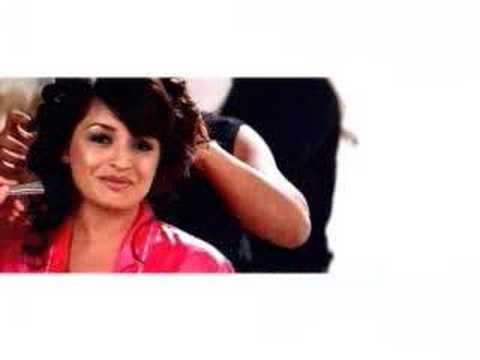

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('o8uyuQRxyB0')

In [2]:
# import, and indicate that jr_common will need auto-reloading
%aimport jr_common
# import as idempotent; here we just use it to give us a more convenient namespace
import jr_common as jr

In [9]:
run = jr.load_fit_file()
run.head()

,fractional_cadence_rpm,lap,alt,cad,dist,hr,lat,lon,speed
time,,,,,,,,,
00:00:00,0.890625,1,0.0,48.0,0.00,NaN,-34.092336,18.816189,3.930
00:00:01,0.890625,1,0.0,48.0,4.02,NaN,-34.092371,18.816189,4.018
00:00:02,0.890625,1,0.2,48.0,8.02,NaN,-34.092406,18.816189,4.018
00:00:03,0.890625,1,0.4,48.0,12.01,NaN,-34.092442,18.816189,4.017
00:00:04,0.890625,1,0.4,48.0,16.29,NaN,-34.092479,18.816189,4.016


In [15]:
display(run.head())
display(run.describe())

,fractional_cadence_rpm,lap,alt,cad,dist,hr,lat,lon,speed
time,,,,,,,,,
00:00:00,0.890625,1,0.0,48.0,0.00,NaN,-34.092336,18.816189,3.930
00:00:01,0.890625,1,0.0,48.0,4.02,NaN,-34.092371,18.816189,4.018
00:00:02,0.890625,1,0.2,48.0,8.02,NaN,-34.092406,18.816189,4.018
00:00:03,0.890625,1,0.4,48.0,12.01,NaN,-34.092442,18.816189,4.017
00:00:04,0.890625,1,0.4,48.0,16.29,NaN,-34.092479,18.816189,4.016


,fractional_cadence_rpm,lap,alt,cad,dist,hr,lat,lon,speed
count,2369.000000,2369.0,2369.000000,2369.000000,2369.000000,2242.000000,2369.000000,2369.000000,2369.000000
mean,0.605071,1.0,3.248544,85.447024,4116.907780,141.411686,-34.108548,18.821114,3.446640
std,0.258936,0.0,0.742956,14.518622,2343.057615,33.668642,0.008849,0.005150,0.330034
min,0.148438,1.0,0.000000,48.000000,0.000000,79.000000,-34.123049,18.814935,0.205000
25%,0.515625,1.0,2.800000,92.000000,2089.400000,106.000000,-34.116739,18.816203,3.344000
50%,0.531250,1.0,2.800000,92.000000,4095.120000,145.000000,-34.108704,18.820501,3.472000
75%,0.921875,1.0,4.000000,95.000000,6145.290000,173.000000,-34.101067,18.824766,3.593000
max,0.921875,1.0,5.800000,95.000000,8160.870000,194.000000,-34.092071,18.831005,4.018000


In [21]:
# import matplotlib, tell it to use seaborn style
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
display(plt.style.available)
plt.style.use('seaborn')

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

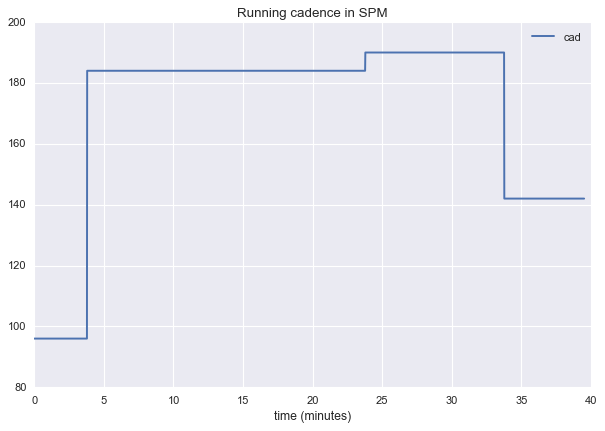

In [23]:
# due to a bug in pandas at the moment, see https://github.com/pandas-dev/pandas/issues/18910
# we can't just do "(run.cad * 2).plot()" as we usually would -- it plots correctly, but omits showing the x-values

# sooooo, we turn the time index into a non-index time column containing elements of type Timedelta
runt = run.reset_index()
# divide by the minute delta to get minutes
runt['time'] = runt.time / np.timedelta64(1, 'm')
runt['cad'] *= 2

runt.plot(x='time', y='cad')
plt.xlabel('time (minutes)')
plt.title('Running cadence in SPM')
plt.show()

# Leaflet.js maps via the folium package are pretty amazing!

Also, this is a great example where developing the folium code in PyCharm was much faster than having to work here.

With the auto-import configured above, iteratively running the new code was a cinch!

In [26]:
import folium

m = jr.make_folium_map_with_run(runt)

m

96.0 190.0


In [14]:
# https://matplotlib.org/1.4.1/examples/color/colormaps_reference.html
import branca
display(branca.colormap.linear.BuPu_05)
display(branca.colormap.linear.Oranges_05)

# Basemap experiments

I started with the matplotlib basemap extension, but in the end folio was miles better for this specific application.

I'm keeping these examples here just in case they help you.

/Users/cpbotha/miniconda3/envs/vxuni/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/Users/cpbotha/miniconda3/envs/vxuni/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1712: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


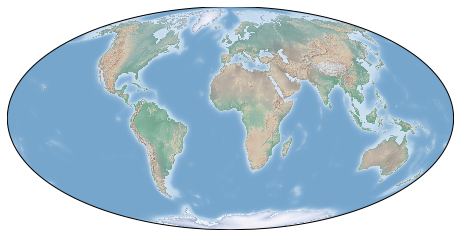

In [15]:
# warmup: draw the globe!

from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

# if you run into the `os.environ['PROJ_LIB']` not being defined issue, it could just be because you did not
# reactivate your conda environment after installing proj4. The conda package has an activation hook which sets
# PROJ_LIB to the correct value.
m.shadedrelief(scale=0.2)


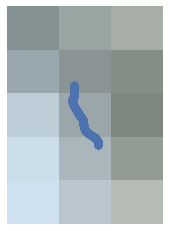

In [16]:
plt.figure()
mr = Basemap(projection='merc', resolution='f',
             llcrnrlon=np.min(runt.lon)-0.04, llcrnrlat=np.min(runt.lat)-0.04,
             urcrnrlon=np.max(runt.lon)+0.04, urcrnrlat=np.max(runt.lat)+0.04,
             lat_0=np.mean(runt.lat), lon_0=np.mean(runt.lon))
mr.scatter(x=runt.lon.values, y=runt.lat.values, latlon=True)
mr.shadedrelief()

In [34]:
np.min(runt.lon)

18.814935330301523

In [21]:
42

42